<a href="https://colab.research.google.com/github/munieshwarevakattu/CMPE257-FALL23-MUNIESHWAR-EVAKATTU/blob/Class-Activities/PLA_%26_POCKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Data Samples')

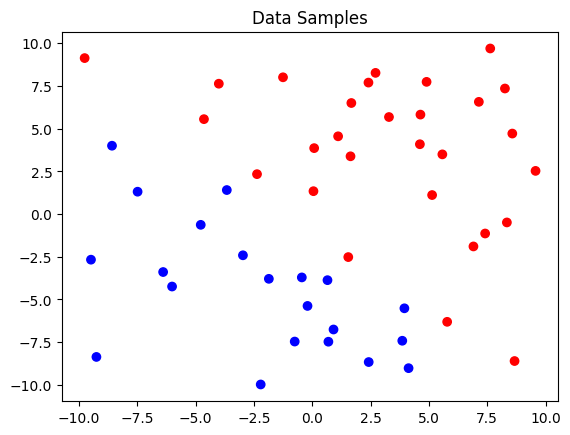

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


synt= pd.read_csv('synthetic_dataset.csv')
synt.head()

#Looking at the data points in a scatter plot
x1 = synt['x1']
x2 = synt['x2']
y = synt['y']
colors = ['red' if label == 1 else 'blue' for label in y]

fig = plt.scatter(x1, x2, c=colors)
plt.title("Data Samples")

In [292]:
# Perceptron ALgorithm

synt['x0'] = 1
X = synt[['x0', 'x1', 'x2']].values
y = synt['y'].values
observations, features = X.shape
#intial_weights = np.zeros(X.shape[1])
#intial_weights = [1,1.5,1]
#weights_l=[1,1.5,1]

def perceptron_algo(X, y, max_iterations=observations):
    weights = np.zeros(X.shape[1])
    #weights=[1,1.5,-1]
    for i in range(max_iterations):
        misclassified = 0
        for j in range(observations):
            #prediction = np.sign(np.dot(X[j],weights))
            #if prediction != y[j]:
            if y[j] * np.dot(X[j], weights) <= 0:
                weights += y[j] * X[j]
                misclassified += 1
        if misclassified == 0:
            break

        print(f"iteration:{i+1} , weights{weights}, Number of misclassified: {misclassified}")

    return weights, misclassified

pla_weights,misclassified = perceptron_algo(X, y)

def validate(weights, X, y):
    predict = np.sign(np.dot(X, weights))
    accuracy = np.mean(predict == y)
    return accuracy
accuracy=validate(pla_weights,X,y)



print(f"Best Weights: {pla_weights}, Number of misclassified: {misclassified}")
print(f"Accuracy: {accuracy*100} %")


iteration:1 , weights[ 6.          8.15289571 18.17710968], Number of misclassified: 10
iteration:2 , weights[ 9.          5.72231963 18.48106118], Number of misclassified: 3
iteration:3 , weights[12.         15.25753228 15.61941417], Number of misclassified: 5
iteration:4 , weights[14.          7.04547206 22.23435375], Number of misclassified: 2
iteration:5 , weights[15.          7.41653362 24.84712185], Number of misclassified: 3
iteration:6 , weights[15.         17.54321156 18.32532456], Number of misclassified: 2
iteration:7 , weights[17.          9.33115134 24.94026414], Number of misclassified: 2
iteration:8 , weights[18.          9.7022129  27.55303224], Number of misclassified: 3
iteration:9 , weights[20.         15.85475859 23.85481227], Number of misclassified: 4
iteration:10 , weights[23.         13.42418251 24.15876377], Number of misclassified: 3
iteration:11 , weights[26.         10.99360643 24.46271527], Number of misclassified: 3
iteration:12 , weights[27.         11.36

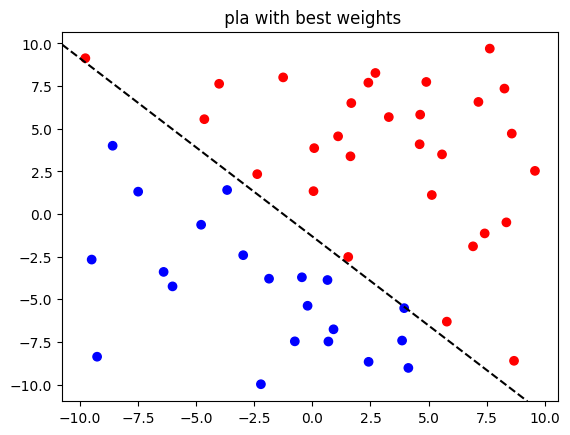

In [293]:
def plot(weights,title):
  x1 = synt['x1']
  x2 = synt['x2']
  y = synt['y']
  colors = ['red' if label == 1 else 'blue' for label in y]
  plt.scatter(x1, x2, c=colors)
  # Plot the decision boundary as a line
  x1_min, x1_max = x1.min() - 1, x1.max() + 1
  x2_min, x2_max = x2.min() - 1, x2.max() + 1
  xx, yy = np.meshgrid(np.arange(x1_min, x1_max,0.01), np.arange(x2_min, x2_max, 0.01))
  Z = np.dot(np.c_[np.ones_like(xx.ravel()), xx.ravel(), yy.ravel()], weights)
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='dashed')
  plt.title(title)

  plt.show()
plot(pla_weights," pla with best weights")






iteration:1 , weights[ 3.          6.42079694 13.94983758], Number of misclassified: 7
iteration:2 , weights[ 7.          6.23612134 21.94741747], Number of misclassified: 6
iteration:3 , weights[ 8.          6.6071829  24.56018558], Number of misclassified: 3
iteration:4 , weights[10.         12.75972859 20.8619656 ], Number of misclassified: 4
iteration:5 , weights[13.         10.32915251 21.16591711], Number of misclassified: 3
iteration:6 , weights[16.          7.89857643 21.46986861], Number of misclassified: 3
iteration:7 , weights[17.          8.26963799 24.08263671], Number of misclassified: 3
iteration:8 , weights[18.          8.64069955 26.69540482], Number of misclassified: 3
iteration:9 , weights[20.         14.79324524 22.99718484], Number of misclassified: 4
iteration:10 , weights[23.         12.36266916 23.30113635], Number of misclassified: 3
iteration:11 , weights[23.         17.56871845 19.37490927], Number of misclassified: 2
iteration:12 , weights[23.         17.568

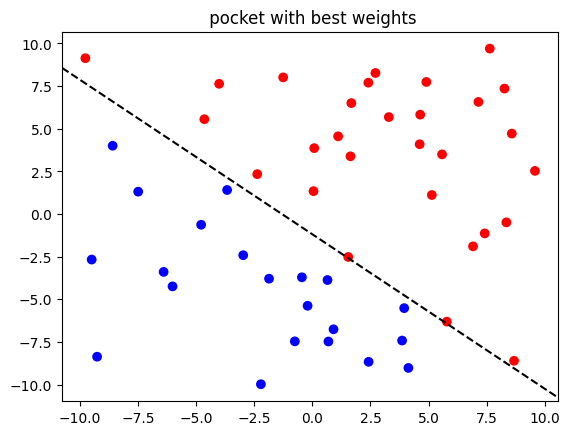

In [291]:
# Pocket Algorithm

def pock_algo(X, y,max_iterations=100):
    weights = np.zeros(X.shape[1])
    pocket_weights = weights.copy()
    best_misclassified = len(X)
    for i in range(max_iterations):
        misclassifications = 0
        for j in range(len(X)):
            currentX = X[j]
            currentY = y[j]
            wx = np.dot(currentX, weights)

            if currentY == 1 and wx < 0:
                misclassifications += 1
                weights += currentX
            elif currentY == -1 and wx >= 0:
                misclassifications += 1
                weights -= currentX
        print(f"iteration:{i+1} , weights{weights}, Number of misclassified: {misclassifications}")
        if misclassifications < best_misclassified:
            best_misclassifications = misclassifications
            pocket_weights = weights.copy()
        if misclassifications==0:
          break

    return pocket_weights,best_misclassifications

pock_weights,misclassified = pock_algo(X, y)

print(f"Best Weights: {pock_weights}, Number of misclassified: {misclassified}")
print(f"Accuracy: {accuracy*100} %")

plot(pock_weights," pocket with best weights")
